In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
from json import dump

In [2]:
ramp_1 = pd.read_csv("../logs/data/ramp_24_11.csv")
ramp_2 = pd.read_csv("../logs/data/ramp_24_11_2.csv")
ramp_3 = pd.read_csv("../logs/data/ramp_27_11.csv")

tau, ss_err = [], []

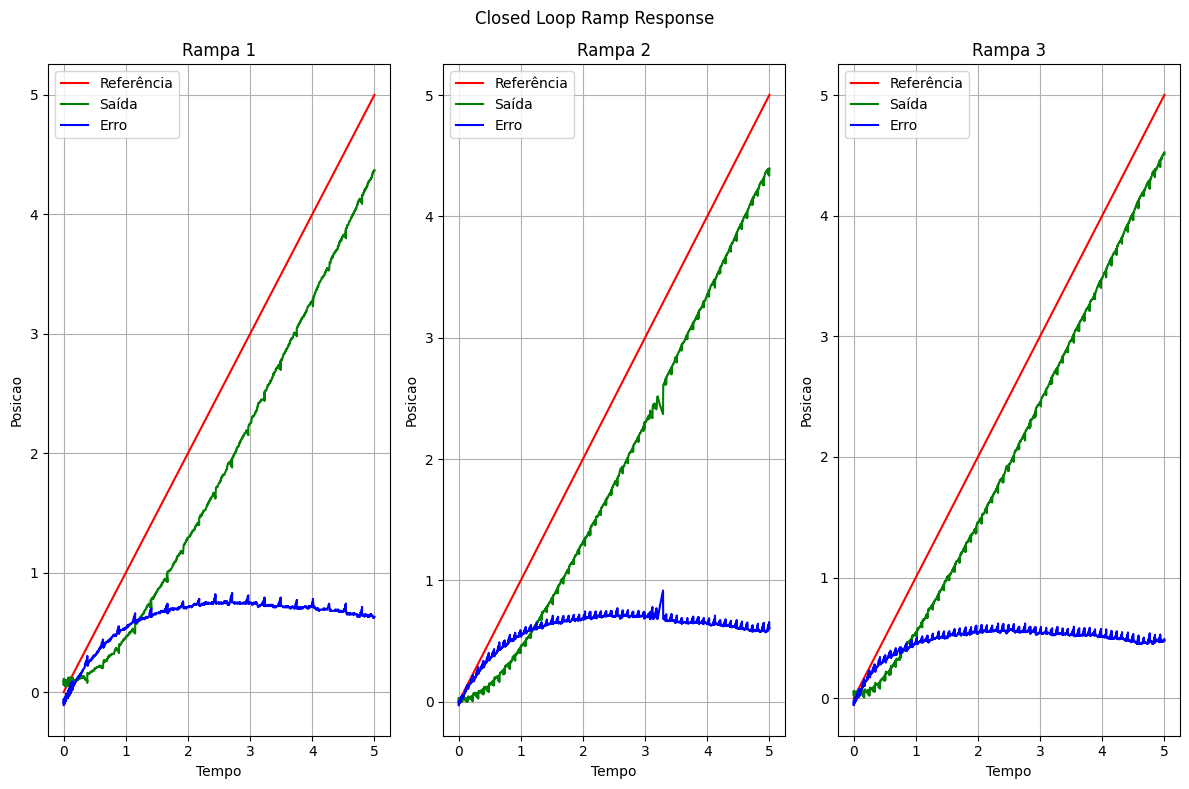

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(12, 8))
fig.suptitle('Closed Loop Ramp Response')

axs[0].plot(ramp_1.iloc[:2454]["Tempo"], ramp_1.iloc[:2454]["Referencia"], c="r", label="Referência")
axs[0].plot(ramp_1.iloc[:2454]["Tempo"], ramp_1.iloc[:2454]["Posicao"], c="g", label="Saída")
axs[0].plot(ramp_1.iloc[:2454]["Tempo"], ramp_1.iloc[:2454]["Erro"], c="b", label="Erro")
axs[0].set_title("Rampa 1")
axs[0].set_xlabel("Tempo")
axs[0].set_ylabel("Posicao")
axs[0].legend()
axs[0].grid(True)
ss_err.append(ramp_1.iloc[:2454].query("Tempo >= 2").Erro.mean())

axs[1].plot(ramp_2.iloc[:1474]["Tempo"], ramp_2.iloc[:1474]["Referencia"], c="r", label="Referência")
axs[1].plot(ramp_2.iloc[:1474]["Tempo"], ramp_2.iloc[:1474]["Posicao"], c="g", label="Saída")
axs[1].plot(ramp_2.iloc[:1474]["Tempo"], ramp_2.iloc[:1474]["Erro"], c="b", label="Erro")
axs[1].set_title("Rampa 2")
axs[1].set_xlabel("Tempo")
axs[1].set_ylabel("Posicao")
axs[1].legend()
axs[1].grid(True)
ss_err.append(ramp_2.iloc[:1474].query("Tempo >= 2").Erro.mean())

axs[2].plot(ramp_3.iloc[:1474]["Tempo"], ramp_3.iloc[:1474]["Referencia"], c="r", label="Referência")
axs[2].plot(ramp_3.iloc[:1474]["Tempo"], ramp_3.iloc[:1474]["Posicao"], c="g", label="Saída")
axs[2].plot(ramp_3.iloc[:1474]["Tempo"], ramp_3.iloc[:1474]["Erro"], c="b", label="Erro")
axs[2].set_title("Rampa 3")
axs[2].set_xlabel("Tempo")
axs[2].set_ylabel("Posicao")
axs[2].legend()
axs[2].grid(True)
ss_err.append(ramp_3.iloc[:1474].query("Tempo >= 2").Erro.mean())

plt.tight_layout()

plt.show()

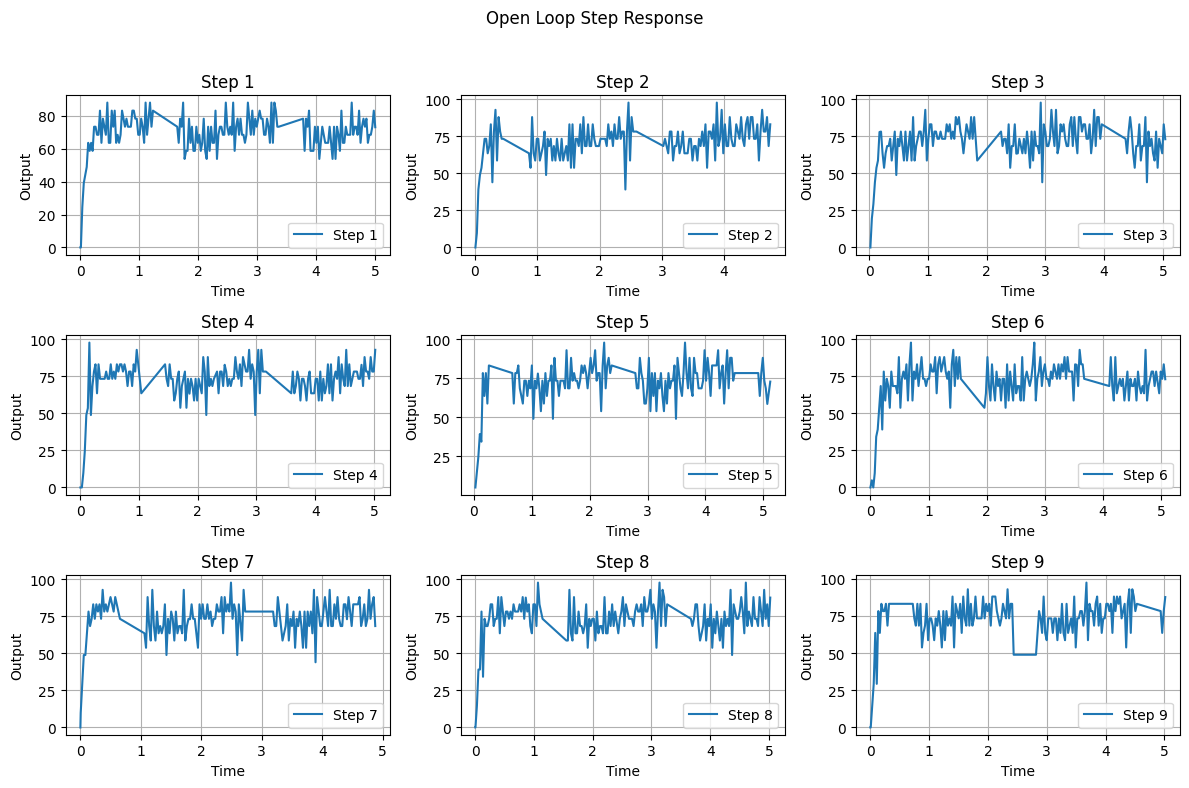

In [4]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8))
fig.suptitle('Open Loop Step Response')

for i in range(1, 10):
    file_path = f'../logs/data/11_12/step_open_loop_{i}.csv'
    df = pd.read_csv(file_path)
    ss_speed = df.query("Time >= 1").Output.mean()
    tau.append(df.loc[df["Output"] >= 0.63*ss_speed].iloc[0, 0])
    row, col = divmod(i-1, 3)
    axs[row, col].plot(df['Time'], df['Output'], label=f'Step {i}')
    axs[row, col].set_title(f'Step {i}')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Output')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout(rect=(0, 0, 1, 0.96))

plt.show()

In [5]:
tau = np.array(tau)
ss_err = np.array(ss_err)
print(f"Constante de tempo: {tau.mean()}s")
print(f"Ganho de malha aberta: {1/ss_err.mean()}")

Constante de tempo: 0.10711333333333456s
Ganho de malha aberta: 1.5755022863155657


In [6]:
with open("../system_parameters/motor_pan.info", "w") as file:
    dump({
        "tau": tau.mean(),
        "K":1/ss_err.mean()
    }, file)

In [7]:
tau, ss_err = [], []

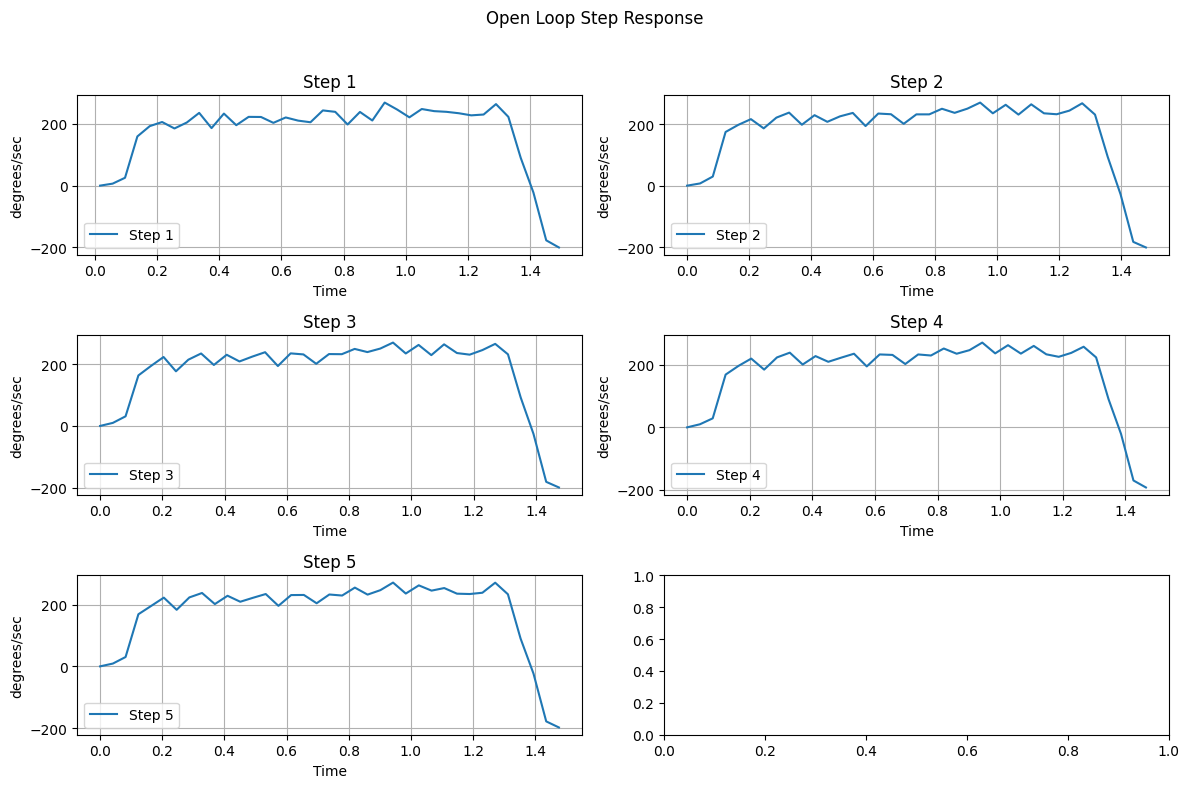

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
fig.suptitle('Open Loop Step Response')

for i in range(1, 6):
    file_path = f'/home/nikolas/Documents/GitHub/Controller/logs/{i}_step_open_loop_2024-01-10 21:17:14.762576.csv'
    df = pd.read_csv(file_path).query("Tempo <= 1.5")
    row, col = divmod(i-1, 2)

    ss_speed = df.query("Tempo >= 0.2 and Tempo <= 1.2").Velocidade.mean()
    tau.append(df.loc[df["Velocidade"] >= 0.63*ss_speed].iloc[0, 0])

    axs[row, col].plot(df['Tempo'], df['Velocidade']*60, label=f'Step {i}')
    axs[row, col].set_title(f'Step {i}')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('degrees/sec')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout(rect=(0, 0, 1, 0.96))

plt.show()

In [9]:
tau = np.array(tau)
print(f"Constante de tempo: {tau.mean()}s")

Constante de tempo: 0.1260841122s


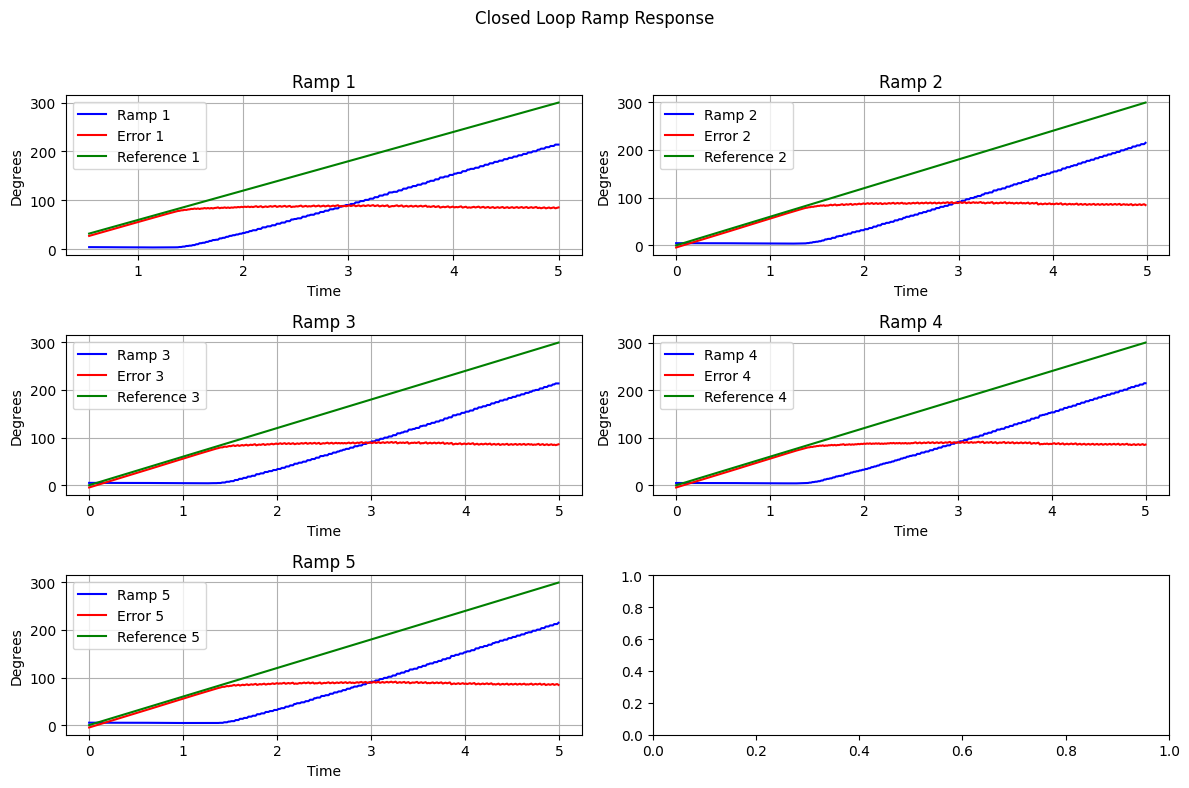

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
fig.suptitle('Closed Loop Ramp Response')

for i in range(1, 6):
    file_path = f'/home/nikolas/Documents/GitHub/Controller/logs/{i}_ramp_closed_loop_2024-01-10 20:43:48.833625.csv'
    df = pd.read_csv(file_path).query("Referencia <= 5")
    row, col = divmod(i-1, 2)

    ss_err.append(df.query("Referencia >= 2").Erro.mean())

    axs[row, col].plot(df['Referencia'], df['Saída']*60, c="b", label=f'Ramp {i}')
    axs[row, col].plot(df['Referencia'], df['Erro']*60, c="r", label=f"Error {i}")
    axs[row, col].plot(df['Referencia'], df['Referencia']*60, c="g", label=f"Reference {i}")
    axs[row, col].set_title(f'Ramp {i}')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Degrees')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout(rect=(0, 0, 1, 0.96))

plt.show()

In [11]:
ss_err = np.array(ss_err)
print(f"Ganho de malha aberta: {1/ss_err.mean()}")

Ganho de malha aberta: 0.6843218125360834


In [12]:
with open("../system_parameters/motor_pan.info", "w") as file:
    dump({
        "tau": tau.mean(),
        "K":1/ss_err.mean()
    }, file)